# MATA KUPVA
## Text Extraction from PDF to plain text
## Plaintext to NER

In [1]:
# Inisiasi libarry yg dibutuhkan
import pytesseract
from pdf2image import convert_from_path
from spire.doc import * # doc to pdf 
from spire.doc.common import *
import sys
import re
import os
# from spire.corpus import stopwords
import csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
import string
if 'win' in sys.platform:
    pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# pandas configuration
# import pandas as pd
# pd.set_option('mode.chained_assignment', None)
config = ('-l eng --oem 1 --psm 3 --psm 13')


1. Menentukan file yang akan dianalisis
Di dalam aplikasi , dilakukan dalam satu directory
2. Konversi semua file ke dalam bentuk PDF
3. Konversi bentuk PDF to List Image
4. Menentukan area yang akan dikonversi ke dalam text. Memisahkan header, footer dan body.
4. Ekstrasi ke dalam bentuk text (body)


In [2]:
# Doc to Pdf conversion
def doc_to_text_processing(path_file):
    print("doc_to_text_processing :", path_file)
    # Create a Document object
    document = Document()
    # Load a Word DOCX file
    # try :
    document.LoadFromFile(path_file)
    parameters = ToPdfParameterList() # Create a ToPdfParameterList object        
    parameters.IsEmbeddedAllFonts = True # Embed all used fonts in Word into PDF        
    parameters.PdfConformanceLevel = PdfConformanceLevel.Pdf_A1A# Set the conformance level for PDF        
    document.SaveToFile("WordToPdf_temp.pdf", parameters) # Save the file to a PDF file
    dir_path = os.path.dirname(os.path.realpath("__file__"))
    # If you're using the code inside a .py file: Use os.path.abspath(__file__) If you're using the code on a script directly or in Jupyter Notebooks: Put the file inside double-quotes. os.path.abspath("__file__")
    fullpath_file_temp = os.path.join(dir_path, "WordToPdf_temp.pdf")
    full_string = pdf_to_text_processing(fullpath_file_temp,5,500,2482,3200)
    # except Exception as e:
    #     fullpath_file =""
    #     print("Error doc_to_pdf(path_file) : ", str(e))
    document.Close()
    # if os.path.exists("WordToPdf_temp.pdf"):
    #     os.remove("WordToPdf_temp.pdf")
    return full_string

In [4]:
# pdf to image  (list) , multi pages
# image to text
def pdf_to_text_processing(path_file, c_left, c_top, c_right, c_bottom):
    print("pdf_to_text_processing :", path_file)
    list_img = convert_from_path(path_file, dpi=300, grayscale=True)
    # Extract Text from Image
    # Size of the image in pixels (size of original image)
    # width, height = img.size
    # print(width,"--", height)
    # Setting the points for cropped image
    left = c_left
    top = c_top
    right = c_right
    bottom = c_bottom
    # Cropped image of above dimension (It will not change original image)
    text = ""
    i = 0
    # test image
    image = list_img[0]
    # # display(image)
    # left = 5
    # top = 900
    # right = 2482
    # bottom = 3200
    img_1 = image.crop((left, top, right, bottom))
    # display(img_1)
    while i < len(list_img):
        img = list_img[i]
        img_1 = img.crop((left, top, right, bottom))
        text = text + pytesseract.image_to_string(img_1, lang='ind')
        i += 1
    return (len(list_img), text) # jumlah halaman , text

In [9]:
# Setting directory 
online_dir = r"/home/dbcooper/data_putusan/"
local_dir = r"D:\2.CODE\PYTHON\BI_HACKATHON_2024\mata_kupva\text_extraction\dataset\putusan_ma" +"\\"
# List files in the dataset directory
# dataset_files = os.listdir(online_dir)
# print(dataset_files)


In [10]:
# path_file= r"D:\2.CODE\PYTHON\AI\project_putusan\text_extraction\input_pdf\putusan1105.pdf"
file = "putusan_25_pid.tpk_2020_pt_dki_20240515080628.pdf"
# path_file= r"D:\2.CODE\PYTHON\BI_HACKATHON_2024\mata_kupva\text_extraction\dataset\putusan_ma\putusan_25_pid.tpk_2020_pt_dki_20240515080628.pdf"
path_file = local_dir + file

check_file = os.path.isfile(path_file)
print(check_file)


# path_file = r"D:\2.CODE\PYTHON\AI\project_putusan\text_extraction\data_ltkm\DOC Files / 1. HA-Fitrias Bakar.doc"
# path_file = r"D:\2.CODE\PYTHON\AI\project_putusan\text_extraction\data_ltkm\DOC Files\1Analisa_LTKM_Penggelapan__Ubaydillah_Sarip_PPATK.doc"
# path_file = r"D:\2.CODE\PYTHON\AI\project_putusan\text_extraction\data_ltkm\DOC Files\4LTKM_an.__M._Hilman_Ayyubi.doc"
# path_file= r"D:\2.CODE\PYTHON\AI\project_putusan\text_extraction\data_sample_ha\Kasus terpidana atas nama PSS.docx"

if path_file.lower().endswith('.doc') or path_file.lower().endswith('.docx'):
    text_from_doc = doc_to_text_processing(path_file)
    print("Jumlah Halaman : ", text_from_doc[0])
    raw_text = text_from_doc[1]
if path_file.lower().endswith('.pdf'):
    text_from_pdf = pdf_to_text_processing(path_file,5,278, 2482,3000) #
    print("Jumlah Halaman : ", text_from_pdf[0])
    raw_text = text_from_pdf[1]

print(raw_text)

True
pdf_to_text_processing : D:\2.CODE\PYTHON\BI_HACKATHON_2024\mata_kupva\text_extraction\dataset\putusan_ma\putusan_25_pid.tpk_2020_pt_dki_20240515080628.pdf
Jumlah Halaman :  68
PUTUSAN
NOMOR 25 /PID.SUS-TPK/2020/PT.DKI

DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA
Pengadilan Tindak Pidana Korupsi pada Pengadilan Tinggi DKI Jakarta yang
memeriksa dan mengadili perkara-perkara Tindak Pidana Korupsi dalam peradilan

tingkat banding telah menjatuhkan putusan seperti tersebut di bawah ini dalam

perkara Terdakwa :

Nama lengkap : INYOMAN DHAMANTRA

Tempat lahir : Jakarta

Umur / Tgl. Lahir : 58 tahun/20 Desember 1961

Jenis kelamin : Laki-laki

Kewarganegaraan : Indonesia

Tempat tinggal : 1. Apartemen Paviliun, Jakarta
Pusat (alamat KTP)
2. Apartemen Permata Safir Unit
910, Jl. Permata Safir, kawasan
Permata Hijau (alamat tempat
tinggal)

Agama : Hindu

Pekerjaan : (mMantan) Anggota DPR RI Komisi VI

Fraksi Partai PDIP.
Pendidikan : Sarjana Muda Ekonomi

Terdakwa ditahan dalam ta

In [11]:
def remove_multispace(text):
    text1 = re.sub('[\n]+', '\n', str(text)) # Replacing one or more consecutive newlines with single \n
    text2 = re.sub(r"(\n)\1{2,}", "", text1).strip()
    text3 = text2.replace('"', '').replace('“','')
    text3a = re.sub('[^a-zA-Z0-9\t\n\r\f\v:][\n]','',text3)
    # text3b = re.sub('[^a-zA-Z0-9\t\n\r\f\v:][^a-zA-Z0-9\t\n\r\f\v:]','',text3a)
    text4 = re.sub(r"Ev[a-zA-Z0-9- $&+,:;=?@#|'<>.^*()%!-]*on\.", '',text3a) # remove Evaluation text
    text4a = re.sub(r"Evaluation[a-zA-Z0-9- $&+,:;=?@#|'<>.^*()%!-]*", '',text4)
    text5 = re.sub('[\n]+', '\n', str(text4a))
    text_clean = text3a
    return text_clean

In [12]:
clean_text = remove_multispace(raw_text)
print(clean_text)

PUTUSAN
NOMOR 25 /PID.SUS-TPK/2020/PT.DKI
DEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA
Pengadilan Tindak Pidana Korupsi pada Pengadilan Tinggi DKI Jakarta yang
memeriksa dan mengadili perkara-perkara Tindak Pidana Korupsi dalam peradilan
tingkat banding telah menjatuhkan putusan seperti tersebut di bawah ini dalam
perkara Terdakwa :
Nama lengkap : INYOMAN DHAMANTRA
Tempat lahir : Jakarta
Umur / Tgl. Lahir : 58 tahun/20 Desember 1961
Jenis kelamin : Laki-laki
Kewarganegaraan : Indonesia
Tempat tinggal : 1. Apartemen Paviliun, Jakarta
Pusat (alamat KTP2. Apartemen Permata Safir Unit
910, Jl. Permata Safir, kawasan
Permata Hijau (alamat tempat
tinggalAgama : Hindu
Pekerjaan : (mMantan) Anggota DPR RI Komisi VI
Fraksi Partai PDIPPendidikan : Sarjana Muda Ekonomi
Terdakwa ditahan dalam tahanan' Rumah Tahanan Negara oleh:
1. Penyidik pada Komisi Pemberantasan Korupsi (KPK), sejak tanggal 8
Agustus 2019 sampai dengan tanggal 27 Agustus 2019:
2. Diperpanjang Penuntut Umum pada Komisi Pemb

In [13]:
# testing
regEx = r'[^a-zA-Z\d\s:][^a-zA-Z\d\s:]'
# re.findall(regEx, 'abc123xyz£,£')
re.findall(regEx, clean_text)
regEx = r'[^a-zA-Z\d\s:][\n]'
# re.findall(regEx, 'abc123xyz£,£')
re.findall(regEx, clean_text)
re.findall(r'[0-9]xuy+', clean_text)

[]

In [14]:
# Create stemmer
from kata_attributes import jenis_dokumen_ha, jenis_dokumen_putusan, jenis_dokumen_transaksi
# from jenis_dokumen_ha import list_kt

test = "Putusan mahkamah agung"
factory = StemmerFactory()
stemmer = factory.create_stemmer()
clean_text_sastrawi = stemmer.stem(clean_text)
# print(clean_text_sastrawi)

list_kt_ha = jenis_dokumen_ha.set_list_kt()
list_kt_transaksi = jenis_dokumen_transaksi.set_list_kt()
list_kt_putusan = jenis_dokumen_putusan.set_list_kt()
jenis_dok = 0 # unknown
print(jenis_dok)
has_checked = False
for i in range(len(list_kt_ha)):
    if list_kt_ha[i] in clean_text_sastrawi:
        jenis_dok =  2 # Hasil Analisis
        has_checked = True
if not has_checked :
    for i in range(len(list_kt_transaksi)):
        if list_kt_transaksi[i] in clean_text_sastrawi:
            jenis_dok =  1 # Laporan Transaksi
            has_checked = True
if not has_checked :
    for i in range(len(list_kt_putusan)):
        if list_kt_putusan[i] in clean_text_sastrawi:
            jenis_dok =  3 # Putusan
print(jenis_dok)
print(len(clean_text_sastrawi))

0
3
108009


['PUTUSAN\nNOMOR 25 /PID.SUS-TPK/2020/PT.DKI\nDEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA\nPengadilan Tindak Pidana Korupsi pada Pengadilan Tinggi DKI Jakarta yang\nmemeriksa dan mengadili perkara-perkara Tindak Pidana Korupsi dalam peradilan\ntingkat banding telah menjatuhkan putusan seperti tersebut di bawah ini dalam\nperkara Terdakwa :\nNama lengkap : INYOMAN DHAMANTRA\nTempat lahir : Jakarta\nUmur / Tgl.', 'Lahir : 58 tahun/20 Desember 1961\nJenis kelamin : Laki-laki\nKewarganegaraan : Indonesia\nTempat tinggal : 1.', 'Apartemen Paviliun, Jakarta\nPusat (alamat KTP2.', 'Apartemen Permata Safir Unit\n910, Jl.', "Permata Safir, kawasan\nPermata Hijau (alamat tempat\ntinggalAgama : Hindu\nPekerjaan : (mMantan) Anggota DPR RI Komisi VI\nFraksi Partai PDIPPendidikan : Sarjana Muda Ekonomi\nTerdakwa ditahan dalam tahanan' Rumah Tahanan Negara oleh:\n1.", 'Penyidik pada Komisi Pemberantasan Korupsi (KPK), sejak tanggal 8\nAgustus 2019 sampai dengan tanggal 27 Agustus 2019:\n2.', 'D

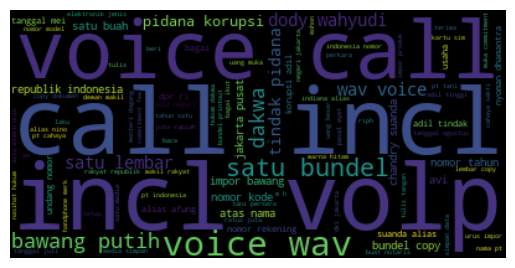

In [16]:
# Word Cloud
# pandas configuration
import pandas as pd
pd.set_option('mode.chained_assignment', None)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk


def remove(kalimat,stopword):
    result = ""
    for kata in nltk.word_tokenize(kalimat.lower()):
        if kata not in stopword:
            result+=kata+" "
    return result

# memanfaatkan library sastrawi untuk stemming dan wordlist stopword yang sudah ada.

factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_factory = StopWordRemoverFactory()
#tambahkan stopworld yang belum ada 
stopword = stop_factory.get_stop_words()
kalimat = nltk.sent_tokenize(clean_text)
print(kalimat)
isi_artikel =""
for i in range(0,len(kalimat)):
    kalimat[i]=remove(stemmer.stem(kalimat[i].lower()),stopword)
    isi_artikel+=kalimat[i]+" "

wordcloud = WordCloud().generate(isi_artikel)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Function keywords
def set_list_activities():
    csv_file_path = r'kata_attributes\activities.csv'
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    with open(csv_file_path, newline='') as csv_file: # read file
        csv_reader = csv.reader(csv_file)
        list_activities = []
        for row in csv_reader:
            activity_lw = str(row[0]).lower()
            kt_dasar_activity = stemmer.stem(activity_lw)
            list_activities.append(kt_dasar_activity)
    # print(list_activities)
    return list_activities

def set_list_daftarpekerjaan():
    csv_file_path =r'kata_attributes\daftar_pekerjaan.csv'
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    with open(csv_file_path, newline='') as csv_file: # read file
        csv_reader = csv.reader(csv_file)
        list_daftarpekerjaan = []
        for row in csv_reader:
            activity_lw = str(row[0]).lower()
            kt_dasar_pekerjaan = stemmer.stem(activity_lw)
            list_daftarpekerjaan.append(kt_dasar_pekerjaan)
    return list_daftarpekerjaan

def set_list_daftarbank():
    csv_file_path = r'kata_attributes\daftar_bank.csv'
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    with open(csv_file_path, newline='') as csv_file: # read file
        csv_reader = csv.reader(csv_file)
        list_daftarbank = []
        for row in csv_reader:
            activity_lw = str(row[0]).lower()
            kt_dasar_pekerjaan = stemmer.stem(activity_lw)
            list_daftarbank.append(kt_dasar_pekerjaan)
    return list_daftarbank

def set_list_daftarbank_goaml():
    csv_file_path = r'kata_attributes\dir_pihak_pelapor_012023.csv'
    df = pd.read_csv(csv_file_path)
    # print(df.head())
    col_list_nmpelapor= list(df["nama"].unique())
    list_pelapor_goaml = []
    i = 0
    while i < len(col_list_nmpelapor):
        nmpelapor_lw_i = str(col_list_nmpelapor[i]).lower()  # dihilangkan kata bank, bpr, bpd, titik dan tanda baca
        nmpelapor_lw_i = nmpelapor_lw_i.translate(str.maketrans('', '', string.punctuation))
        nmpelapor_lw_i = nmpelapor_lw_i.replace("pt ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("bank perkreditan rakyat ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("bank ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("bpr ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("bprs ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("notaris ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kantor jasa akuntan ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kantor jasa akuntansi ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kantor akuntan publik ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("dan ppat ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace(" ppat ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("notarisppat  ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kantor ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("koperasi ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace(" tbk","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kap ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kja ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("ksp ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("kspps ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace(" simpan pinjam ","")
        nmpelapor_lw_i = nmpelapor_lw_i.replace("simpan pinjam pembiayaan syariah btm ","")
        list_pelapor_goaml.append(nmpelapor_lw_i)
        i = i + 1
    return (list_pelapor_goaml)

def set_list_daftarkelind_goaml():
    csv_file_path = r'kata_attributes\dir_pihak_pelapor_012023.csv'
    df = pd.read_csv(csv_file_path)
    # for col in df.columns:
    #     print(col)
    # print(df.head())
    col_list_nmkelind= list(df["kel_ind"].unique())
    # print(col_list_nmkelind)
    list_kelind_goaml = []
    i = 0
    while i < len(col_list_nmkelind):
        nmkelind_lw_i = str(col_list_nmkelind[i]).lower()
        nmkelind_lw_i = nmkelind_lw_i.translate(str.maketrans('', '', string.punctuation))
        list_kelind_goaml.append(nmkelind_lw_i)
        i = i + 1
    return (list_kelind_goaml)

def set_list_daftarpelapor():
    csv_file_path = r'kata_attributes\daftar_pelapor_uu.csv'
    with open(csv_file_path, newline='') as csv_file: # read file
        csv_reader = csv.reader(csv_file)
        list_daftarbank = []
        for row in csv_reader:
            activity_lw = str(row[0]).lower()
            list_daftarbank.append(activity_lw)
    return list_daftarbank

In [18]:

# Mencari kata yang sesuai dengan keywords
keyword_1 = set_list_activities()
keyword_2 = set_list_daftarpekerjaan()
keyword_3 = set_list_daftarbank()
keyword_4 = set_list_daftarbank_goaml()
keyword_5 = set_list_daftarkelind_goaml()
keyword_6 = set_list_daftarpelapor()
[keyword_1.extend(l) for l in (keyword_2,keyword_3,keyword_4,keyword_5,keyword_6)]

print(keyword_1)

['kerja sama modal', 'transfer luar negeri', 'bawa uang luar negeri', 'usaha fiktif', 'judi', 'ekspor impor', 'pinjam', 'dokumen palsu', 'ite', 'pabean', 'korupsi', 'narkotika', 'palsu uang', 'culi', 'curi', 'gelap', 'tipu', 'selundup migran', 'selundup tenaga kerja', 'suap', 'dagang orang', 'dagang senjata gelap', 'judi', 'prostitusi', 'psikotropika', 'terorisme', 'rekening', 'transaksi', 'urus rumah tangga', 'irt', 'art', 'ajar mahasiswa', 'pensiun', 'pegawai negeri sipil', 'pns', 'tentara nasional indonesia', 'tni', 'polisi ri', 'polisi', 'dagang', 'tani kebun', 'ternak', 'nelayan ikan', 'industri', 'konstruksi', 'transportasi', 'karyawan swasta', 'karyawan bumn', 'karyawan bumd', 'karyawan honorer', 'buruh hari lepas', 'buruh tani kebun', 'buruh nelayan ikan', 'buruh terna', 'bantu rumah tangga', 'tukang cukur', 'tukang listrik', 'tukang batu', 'tukang kayu', 'tukang sol sepatu', 'tukang las pandai besi', 'tukang jahit', 'tukang gigi', 'tata rias', 'tata busana', 'tata rambut', 'me

In [19]:
text_lower = clean_text.lower()
print (text_lower)

putusan
nomor 25 /pid.sus-tpk/2020/pt.dki
demi keadilan berdasarkan ketuhanan yang maha esa
pengadilan tindak pidana korupsi pada pengadilan tinggi dki jakarta yang
memeriksa dan mengadili perkara-perkara tindak pidana korupsi dalam peradilan
tingkat banding telah menjatuhkan putusan seperti tersebut di bawah ini dalam
perkara terdakwa :
nama lengkap : inyoman dhamantra
tempat lahir : jakarta
umur / tgl. lahir : 58 tahun/20 desember 1961
jenis kelamin : laki-laki
kewarganegaraan : indonesia
tempat tinggal : 1. apartemen paviliun, jakarta
pusat (alamat ktp2. apartemen permata safir unit
910, jl. permata safir, kawasan
permata hijau (alamat tempat
tinggalagama : hindu
pekerjaan : (mmantan) anggota dpr ri komisi vi
fraksi partai pdippendidikan : sarjana muda ekonomi
terdakwa ditahan dalam tahanan' rumah tahanan negara oleh:
1. penyidik pada komisi pemberantasan korupsi (kpk), sejak tanggal 8
agustus 2019 sampai dengan tanggal 27 agustus 2019:
2. diperpanjang penuntut umum pada komisi pemb

In [20]:
list_sim= [i for i, x in enumerate(keyword_1) if x in text_lower]
print(list_sim)
for x in list_sim:
    print(keyword_1[x])

[8, 10, 14, 26, 27, 29, 30, 39, 43, 95, 97, 98, 103, 104, 114, 156, 259, 1320, 1843, 1932, 2618, 3741, 4157, 4177, 5151, 5392, 5755, 5762, 15849, 15881, 16080, 16081, 16095, 16115, 16126]
ite
korupsi
curi
rekening
transaksi
irt
art
dagang
industri
guru
acara
notaris
bidan
awat
dagang
bank mandiri
kuh
wahyudi
erika
eka
ibnu
zulfikar
agustina
tio
marta
agustina
pedagang valuta asing
anf
salina
kasir
notaris
pedagang valuta asing
bank
bank
pedagang valuta asing


In [21]:
# menggunakan keyword yang sudah ditentukan 
def remove(kalimat,stopword):
    result = ""
    for kata in nltk.word_tokenize(kalimat.lower()):
        if kata in stopword:
            result+=kata+" "
    return result

# memanfaatkan library sastrawi untuk stemming dan wordlist stopword yang sudah ada.
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_factory = StopWordRemoverFactory()
#tambahkan stopworld yang belum ada 
stopword = keyword_1 #stop_factory.get_stop_words()

kalimat = nltk.sent_tokenize(clean_text)
print(kalimat)
isi_artikel =""
for i in range(0,len(kalimat)):
    kalimat[i]=remove(stemmer.stem(kalimat[i].lower()),stopword)
    isi_artikel+=kalimat[i]+" "

print(isi_artikel)

# wordcloud = WordCloud().generate(isi_artikel)
# plt.figure()
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

['PUTUSAN\nNOMOR 25 /PID.SUS-TPK/2020/PT.DKI\nDEMI KEADILAN BERDASARKAN KETUHANAN YANG MAHA ESA\nPengadilan Tindak Pidana Korupsi pada Pengadilan Tinggi DKI Jakarta yang\nmemeriksa dan mengadili perkara-perkara Tindak Pidana Korupsi dalam peradilan\ntingkat banding telah menjatuhkan putusan seperti tersebut di bawah ini dalam\nperkara Terdakwa :\nNama lengkap : INYOMAN DHAMANTRA\nTempat lahir : Jakarta\nUmur / Tgl.', 'Lahir : 58 tahun/20 Desember 1961\nJenis kelamin : Laki-laki\nKewarganegaraan : Indonesia\nTempat tinggal : 1.', 'Apartemen Paviliun, Jakarta\nPusat (alamat KTP2.', 'Apartemen Permata Safir Unit\n910, Jl.', "Permata Safir, kawasan\nPermata Hijau (alamat tempat\ntinggalAgama : Hindu\nPekerjaan : (mMantan) Anggota DPR RI Komisi VI\nFraksi Partai PDIPPendidikan : Sarjana Muda Ekonomi\nTerdakwa ditahan dalam tahanan' Rumah Tahanan Negara oleh:\n1.", 'Penyidik pada Komisi Pemberantasan Korupsi (KPK), sejak tanggal 8\nAgustus 2019 sampai dengan tanggal 27 Agustus 2019:\n2.', 'D

In [22]:
# Setelah word cloud
# selanjutnya menggunakan NER terkait dengan nama bank 
# https://utomorezadwi.medium.com/spacy-untuk-training-model-ner-menggunakan-anotasi-bahasa-indonesia-70c900c40d42

# tokenisasi kalimat
t_kalimat = sent_tokenize(clean_text_sastrawi)
print(t_kalimat)
# tokenisasi kata

t_kata = word_tokenize(clean_text_sastrawi)
print(t_kata)
stop_words = set(stopwords.words('indonesian'))
more_stopword = ['']  # menambahkan stopword
stop_words = set(stopwords.words('indonesian') + more_stopword)
word_tokens_no_stopwords = [w for w in t_kata if not w in stop_words]
print(word_tokens_no_stopwords)


NameError: name 'sent_tokenize' is not defined

In [ ]:
text_keywords = word_tokens_no_stopwords
print(text_keywords)

In [ ]:
# Pengecekan jenis dokumen 
# 1. Di cek apakah ada kata hasil analisis
# 2. Apabila tidak ditemukan, maka merupakan laporan transaksi 
# print(clean_text)

    